In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import LogisticRegression
import random
import pydotplus

%matplotlib inline

In [2]:
train_data_file_name = 'train_data.csv'
test_data_file_name = 'test_data.csv'

train_data = pd.read_csv(train_data_file_name)
test_data = pd.read_csv(test_data_file_name)

train_data.drop(['Date', 'Volume'], axis=1, inplace=True)
train_data['CPI'] = train_data['Close Price'] - train_data['Close Price'].shift(1)
train_data['CPI'].iloc[0] = 0
train_data['CPI'] = pd.Series(map(lambda x: 1 if x > 0 else 0, train_data['CPI']))



test_data.drop(['Date', 'Volume'], axis=1, inplace=True)
test_data['CPI'] = test_data['Close Price'] - test_data['Close Price'].shift(1)
test_data['CPI'].iloc[0] = 0
test_data['CPI'] = pd.Series(map(lambda x: 1 if x > 0 else 0, test_data['CPI']))

test_data.head()

,Open Price,Close Price,High Price,Low Price,CPI
0,2683.73,2695.81,2695.89,2682.36,0
1,2697.85,2713.06,2714.37,2697.77,1
2,2719.31,2723.99,2729.29,2719.07,1
3,2731.33,2743.15,2743.45,2727.92,1
4,2742.67,2747.71,2748.51,2737.60,1


In [9]:
def split(train_d, test_d):
    # control randomization for reproducibility
    #np.random.seed(42)
    #random.seed(42)
    #train, test = model_selection.train_test_split(train_data)
    x_train = train_d.loc[:, train_d.columns != 'CPI']
    y_train = train_d['CPI']
    x_test = test_d.loc[:, test_d.columns != 'CPI']
    y_test = test_d['CPI']
    return x_train.astype('int'), y_train.astype('int'), x_test.astype('int'), y_test.astype('int')

In [4]:
def plot_feature(data, feature_name):
    plt.figure(figsize=(10, 5))
    plt.scatter(data[feature_name], data['CPI'])
    plt.xlabel(feature_name)
    plt.ylabel('CPI')
    plt.show()

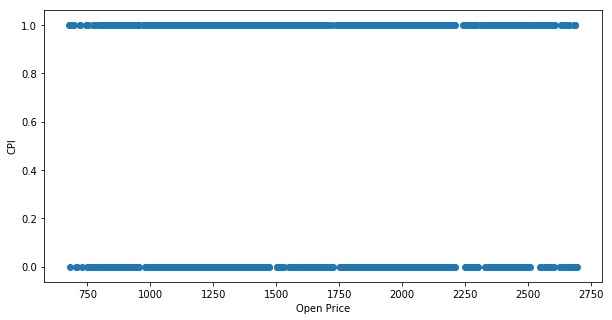

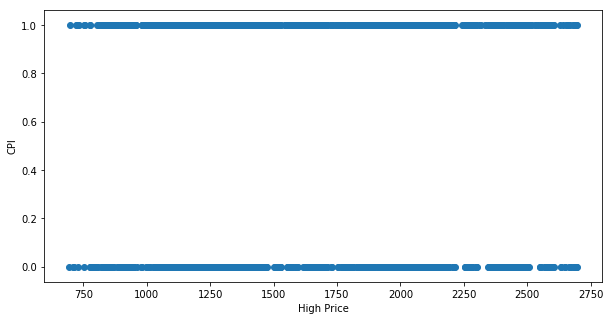

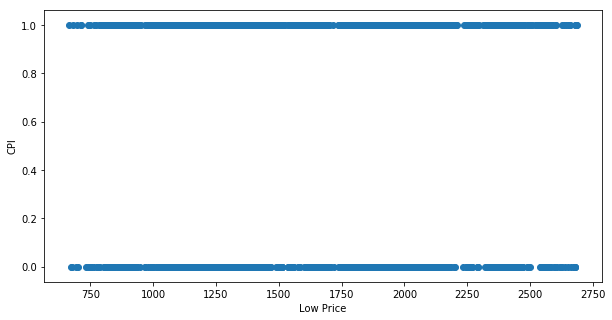

In [5]:
plot_feature(train_data, 'Open Price')
plot_feature(train_data, 'High Price')
plot_feature(train_data, 'Low Price')

In [6]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)
    plt.plot(x_test)
    plt.plot(test_preds)

In [7]:
def split_train_evaluate(model, train_d, test_d):
    x_train, y_train, x_test, y_test = split(train_data, test_data)
    model.fit(x_train, y_train)
    evaluate(model, x_train, y_train, x_test, y_test)

# model_bl = linear_model.SGDClassifier(loss='log', max_iter=10000)
# split_train_evaluate(model_bl, train_data, test_data)

Train accuracy: 0.9408127208480566
Test accuracy: 0.8174603174603174


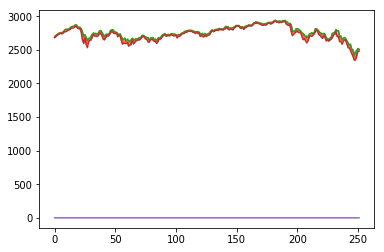

In [20]:
from sklearn.linear_model import LogisticRegression
x_train, y_train, x_test, y_test = split(train_data, test_data)
# No difference in result between max_iter=100 and max_iter = 10000
clf = LogisticRegression(solver='lbfgs', max_iter=100).fit(x_train, y_train)
split_train_evaluate(clf, train_data, test_data)